In [1]:
import time
start_time = time.time()
import os
import numpy as np
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import backend as K
from keras.optimizers import adam
from keras import models
import cv2
#import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time 
#import progressbar
#from tqdm.notebook import tqdm_notebook
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
#from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, AveragePooling2D, Conv2D, Flatten

Using TensorFlow backend.


In [2]:
# extracting dataframe of cartoon dataset
face_shape = pd.read_csv('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21/cartoon_set/labels.csv', sep = '\t')
face_shape = face_shape.drop(columns = [face_shape.columns[0]]).drop(columns = [face_shape.columns[1]])
face_shape['face_shape'] = face_shape['face_shape'].apply(str)
#face_shape

In [3]:
img = ('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21/cartoon_set/img')
# splitting training and testing dataset
training, testing = np.split(face_shape.sample(frac=1), [int(0.9*len(face_shape)),]) #splitting at n-array
print(training.shape, testing.shape)
#print_summary(training, testing)


(9000, 2) (1000, 2)


In [10]:
# set up data generator and further split training dataset for validation set
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2,
    horizontal_flip=True,
    vertical_flip=True   
)

# Get batches of training dataset from the dataframe
print("Training Dataset Preparation: ")
train_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "face_shape",
        class_mode = 'categorical', target_size = (32,32),
        batch_size = 128, subset = 'training') 
   
# Get batches of validation dataset from the dataframe
print("\nValidation Dataset Preparation: ")
validation_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "face_shape",
        class_mode = 'categorical', target_size = (32,32),
        batch_size = 128, subset = 'validation')

Training Dataset Preparation: 
Found 7200 validated image filenames belonging to 5 classes.

Validation Dataset Preparation: 
Found 1800 validated image filenames belonging to 5 classes.


In [11]:
model = Sequential(name = 'Face_shape')

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())


model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=5, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = 'Adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "Face_shape"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
average_pooling2d_5 (Average (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
average_pooling2d_6 (Average (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 120)               553080    
_________________________________________________________________
dense_8 (Dense)              (None, 84)                1

In [13]:
# batch_size = 32
history = model.fit_generator(
                                train_generator,
                                epochs=15,
                                steps_per_epoch=train_generator.samples // train_generator.batch_size, 
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // validation_generator.batch_size
                                )

Epoch 1/15
56/56 [==============================] - 71s 1s/step - loss: 1.6115 - accuracy: 0.2023 - val_loss: 1.6113 - val_accuracy: 0.1925
Epoch 2/15
56/56 [==============================] - 79s 1s/step - loss: 1.6099 - accuracy: 0.2025 - val_loss: 1.6101 - val_accuracy: 0.2470
Epoch 3/15
56/56 [==============================] - 76s 1s/step - loss: 1.5843 - accuracy: 0.2687 - val_loss: 1.4885 - val_accuracy: 0.3260
Epoch 4/15
56/56 [==============================] - 76s 1s/step - loss: 1.2871 - accuracy: 0.4304 - val_loss: 1.0846 - val_accuracy: 0.5431
Epoch 5/15
56/56 [==============================] - 74s 1s/step - loss: 1.0610 - accuracy: 0.5270 - val_loss: 1.1188 - val_accuracy: 0.5365
Epoch 6/15
56/56 [==============================] - 72s 1s/step - loss: 0.9450 - accuracy: 0.5901 - val_loss: 0.9639 - val_accuracy: 0.5461
Epoch 7/15
56/56 [==============================] - 74s 1s/step - loss: 0.8550 - accuracy: 0.6336 - val_loss: 0.8788 - val_accuracy: 0.6854
Epoch 8/15
56/56 [==

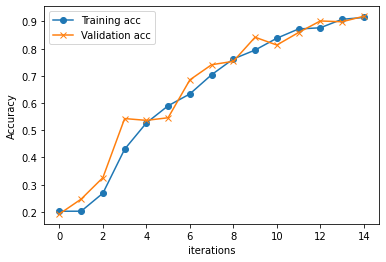

In [14]:
plt.plot(history.history['accuracy'], 'o-', label='Training acc')
plt.plot(history.history['val_accuracy'], 'x-', label='Validation acc')
plt.xlabel('iterations')
plt.ylabel('Accuracy')
plt.legend()

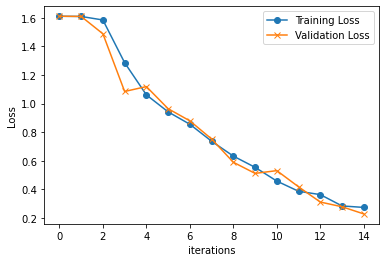

In [15]:
plt.plot(history.history['loss'], 'o-', label='Training Loss')
plt.plot(history.history['val_loss'], 'x-', label='Validation Loss')
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.legend()

In [30]:
model.layers

filter sizes :  (3, 3, 3, 64)


D:\Anaconda\envs\lab1\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


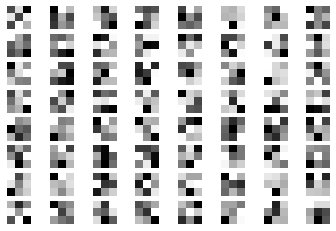

In [33]:
# retrieve weights from the first convolutional layer
filters, biases = model.layers[0].get_weights()
print('filter sizes : ', filters.shape)

# normalize filter values
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = filters.shape[3]
for i in range(n_filters):
    f = filters[:, :, :, i]
    for j in range(f.shape[2]):
        plt.subplot(8, 8, i+1)
        plt.imshow(f[:, :, j], cmap='gray')
        plt.axis('off')

In [28]:
# saving model
from keras.models import load_model

modelFile = 'face_shape.h5'

model.save(modelFile)

In [29]:
os.getcwd()

'C:\\Users\\82419\\Machine Learning\\assignment\\task B'

In [4]:
# extracting new test dataset
df2 = pd.read_csv('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21_test/cartoon_set_test/labels.csv', sep = '\t')
df2 = df2.drop(columns = [df2.columns[0]]).drop(columns = [df2.columns[1]])
df2['face_shape'] = df2['face_shape'].apply(str)
img2 = ('D:/ELEC0134 Applied Machine Learning Systems/assignment/dataset_AMLS_20-21_test/cartoon_set_test/img')

In [9]:
from keras.models import load_model
modelFile = 'face_shape.h5'
saved_model = load_model(modelFile)
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2,
    horizontal_flip=True,
    vertical_flip=True   
)
test_generator = data_generator.flow_from_dataframe(
        dataframe = df2, directory = img2,
        x_col = "file_name", y_col = "face_shape",
        batch_size=1,
        class_mode='categorical', target_size=(32, 32),
        shuffle=False)
test_steps = test_generator.samples

Found 2500 validated image filenames belonging to 5 classes.


In [11]:
test_generator.reset()
pred=saved_model.predict_generator(test_generator, verbose=1, steps=test_steps)
# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
# print(predicted_class_indices)
# label each predicted value to correct face shape
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

2500/2500 [==============================] - 47s 19ms/step


[[395  49   0  36  20]
 [  5 476   0  15   4]
 [  0   0 498   1   1]
 [  3  15   6 469   7]
 [  3   9   2  10 476]]

Confusion Matrix


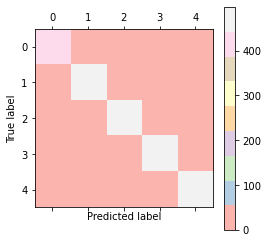

[[0.158  0.0196 0.     0.0144 0.008 ]
 [0.002  0.1904 0.     0.006  0.0016]
 [0.     0.     0.1992 0.0004 0.0004]
 [0.0012 0.006  0.0024 0.1876 0.0028]
 [0.0012 0.0036 0.0008 0.004  0.1904]]

Confusion Matrix (normalised)


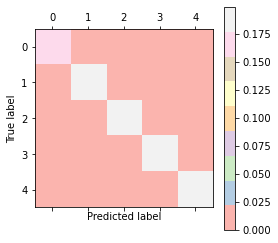

Classification report

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       500
           1       0.87      0.95      0.91       500
           2       0.98      1.00      0.99       500
           3       0.88      0.94      0.91       500
           4       0.94      0.95      0.94       500

    accuracy                           0.93      2500
   macro avg       0.93      0.93      0.92      2500
weighted avg       0.93      0.93      0.92      2500

Accuracy: 0.9256


In [15]:
import sklearn.metrics as metrics
# displaying confusion matrix
cm = confusion_matrix(test_generator.classes, predicted_class_indices)
cmap = plt.get_cmap('Pastel1')
print(cm)
plt.matshow(cm)
plt.imshow(cm, cmap=cmap)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()


cm2 = confusion_matrix(test_generator.classes, predicted_class_indices, normalize='all')

print(cm2)
plt.matshow(cm2)
plt.imshow(cm2, cmap=cmap)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix (normalised)')
plt.show()

print('Classification report\n')
print(classification_report(test_generator.classes, predicted_class_indices))
print('Accuracy:', accuracy_score(test_generator.classes, predicted_class_indices))